In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Den Datensatz laden, um mehr Informationen über das Modell zu bekommen.
(ds_train, ds_valid, ds_test), info = tfds.load('cats_vs_dogs',
                                                split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                with_info=True,
                                                as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.4HI4GV_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
# Ausgeben des Formats der Daten
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [4]:
#Hyper-Params
IMAGE_SIZE = 224
IMAGE_COLORS = 3
TARGET_SIZE = (IMAGE_SIZE,IMAGE_SIZE)
BATCH_SIZE = 128

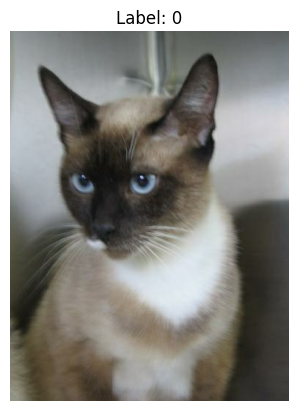

In [5]:
from matplotlib import pyplot as plt

# Anzeigen der Bilder im Datensatz, um visuelle Informationen
# über die Daten zu bekommen.
def dataset_show_sample(ds):
  for element in ds.take(1):
      image_tensor = element[0]
      label = element[1]

      image_array = image_tensor.numpy()

      plt.imshow(image_array)
      plt.title(f"Label: {label}")
      plt.axis('off')
      plt.show()

dataset_show_sample(ds_test)

In [6]:
# Normalisieren des Bildes und resize auf die richtige Größe.
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(
        image,
        TARGET_SIZE,
        method='bilinear'
    )
    image = tf.cast(image, tf.float32) / 255.

    image = tf.image.per_image_standardization(image)

    return image,  label

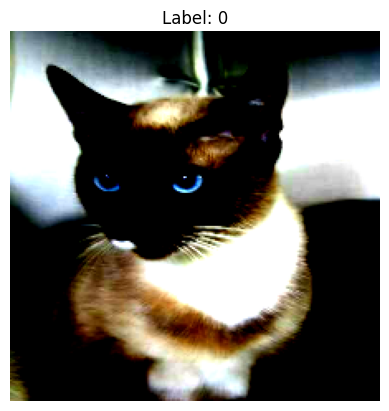

In [7]:
# Normalisieren des Test-Datensatzes.
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128) #BATCH_SIZE
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

dataset_show_sample(ds_test.unbatch())

In [8]:
# Laden des trainierten Modells
model = tf.keras.models.load_model("dogsVsCatsAcc96.keras")
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_23 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 224, 224, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 224, 224, 3)    │         3,459 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,771,793 (10.57 MB)

 Trainable params: 171,269 (669.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 342,540 (1.31 MB)

In [9]:
# Evaluieren des Datensatzes basierend auf dem Test-Split.
model.evaluate(ds_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 179s 9s/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9608


[0.09244241565465927, 0.9608770608901978]

In [10]:
# Laden eines Bildes
!wget https://cdn.pixabay.com/photo/2019/07/23/13/51/shepherd-dog-4357790_1280.jpg

--2025-08-10 16:14:02--  https://cdn.pixabay.com/photo/2019/07/23/13/51/shepherd-dog-4357790_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346014 (338K) [image/jpeg]
Saving to: ‘shepherd-dog-4357790_1280.jpg’

shepherd-dog-435779 100%[===================>] 337.90K  --.-KB/s    in 0.06s   

2025-08-10 16:14:03 (5.17 MB/s) - ‘shepherd-dog-4357790_1280.jpg’ saved [346014/346014]



In [11]:
import numpy as np

# Vorhersagen des abgebildeten Tiers.
img = tf.keras.utils.load_img("shepherd-dog-4357790_1280.jpg")
img, _ = normalize_img(img, None)
img = tf.expand_dims(img, axis=0)
pred = model.predict(img)

print("________________________________________________________________________________________________________________")
print("Cat: ",''.join(["■"for i in range(round(pred[0][0]*100))]),round(pred[0][0]*100), "%")
print("Dog: ",''.join(["■"for i in range(round(pred[0][1]*100))]),round(pred[0][1]*100), "%")
print("________________________________________________________________________________________________________________")
print(["Cat", "Dog"][np.argmax(pred[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
________________________________________________________________________________________________________________
Cat:  ■■ 2 %
Dog:  ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 98 %
________________________________________________________________________________________________________________
Dog
